## The MessagesState Class

### Set the OpenAI API Key as an Environment Variable

In [1]:
%load_ext dotenv
%dotenv
%load_ext mypy_ipython

### Import Relevant Classes and Functions

In [2]:
from langgraph.graph import START, END, StateGraph, add_messages, MessagesState
from typing_extensions import TypedDict
from langchain_openai.chat_models import ChatOpenAI
from langchain_core.messages import AIMessage, HumanMessage, BaseMessage
from collections.abc import Sequence
from typing import Literal, Annotated

## Get Familiar with the add_messages Function

In [5]:
my_list = add_messages([HumanMessage("Hi! I'm Oscar."),
                        AIMessage("Hey, Oscar. How can I assist you?")],
                       [HumanMessage("Could you summarize today's news?")])

In [6]:
my_list

[HumanMessage(content="Hi! I'm Oscar.", additional_kwargs={}, response_metadata={}, id='30c8631a-bdfa-4417-b767-f8578284289b'),
 AIMessage(content='Hey, Oscar. How can I assist you?', additional_kwargs={}, response_metadata={}, id='4ae69d5d-6216-4dd3-ac0a-9056e2cea86e', tool_calls=[], invalid_tool_calls=[]),
 HumanMessage(content="Could you summarize today's news?", additional_kwargs={}, response_metadata={}, id='ac564fde-b0d5-4058-b951-0dcf5c4bea4b')]

## Define the Nodes

In [3]:
chat = ChatOpenAI(model = "gpt-4",
                  seed = 365,
                  temperature = 0,
                  max_completion_tokens = 100)

In [4]:
def ask_question(state: MessagesState) -> MessagesState:
    print(f"\n-------> ENTERING ask_question:")
    for i in state['messages']:
        i.pretty_print()

    question = "What is your question?"
    print(question)
    
    return MessagesState(messages = [AIMessage(question), HumanMessage(input())])

In [5]:
def chatbot(state: MessagesState) -> MessagesState:
    
    print(f"\n-------> ENTERING chatbot:")
    for i in state['messages']:
        i.pretty_print()
        
    response = chat.invoke(state["messages"])
    response.pretty_print()
    
    return MessagesState(messages = [response])

In [6]:
def ask_another_question(state: MessagesState) -> MessagesState:
    print(f"\n-------> ENTERING ask_another_question:")
    for i in state['messages']:
        i.pretty_print()
    
    question = "Would you like to ask one more question (yes/no)?"
    print(question)

    return MessagesState(messages = [AIMessage(question), HumanMessage(input())])

## Define the Routing Function

In [7]:
def routing_function(state: MessagesState) -> Literal["ask_question", "__end__"]:

    if state["messages"][-1].content == "yes":
        return "ask_question"
    else:
        return "__end__"

## Define the Graph

In [8]:
graph = StateGraph(MessagesState)

In [9]:
graph.add_node("ask_question", ask_question)
graph.add_node("chatbot", chatbot)
graph.add_node("ask_another_question", ask_another_question)

graph.add_edge(START, "ask_question")
graph.add_edge("ask_question", "chatbot")
graph.add_edge("chatbot", "ask_another_question")
graph.add_conditional_edges(source = "ask_another_question", path = routing_function)

In [10]:
graph_compiled = graph.compile()

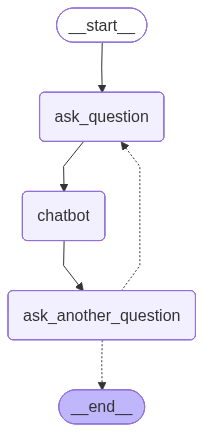

In [11]:
graph_compiled

## Test the graph

In [12]:
graph_compiled.invoke(MessagesState(messages = []))


-------> ENTERING ask_question:
What is your question?


 Could you give me a poem by Pushkin?



-------> ENTERING chatbot:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

Could you give me a poem by Pushkin?
================================== Ai Message ==================================

Sure, here is a famous poem by Alexander Pushkin titled "I Loved You":

I loved you, and I probably still do,
And for a while the feeling may remain...
But let my love no longer trouble you,
I do not wish to cause you any pain.

I loved you; and the hopelessness I knew,
The jealousy, the shyness - though in vain -
Made up a love so tender and so true
As may God grant you to be loved again.

-------> ENTERING ask_another_question:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

Could you give me a poem by Pushkin?
========

 yes



-------> ENTERING ask_question:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

Could you give me a poem by Pushkin?
================================== Ai Message ==================================

Sure, here is a famous poem by Alexander Pushkin titled "I Loved You":

I loved you, and I probably still do,
And for a while the feeling may remain...
But let my love no longer trouble you,
I do not wish to cause you any pain.

I loved you; and the hopelessness I knew,
The jealousy, the shyness - though in vain -
Made up a love so tender and so true
As may God grant you to be loved again.
================================== Ai Message ==================================

Would you like to ask one more question (yes/no)?
================================ Human Message =================================

yes
What is your question?


 Where was the poet born?



-------> ENTERING chatbot:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

Could you give me a poem by Pushkin?
================================== Ai Message ==================================

Sure, here is a famous poem by Alexander Pushkin titled "I Loved You":

I loved you, and I probably still do,
And for a while the feeling may remain...
But let my love no longer trouble you,
I do not wish to cause you any pain.

I loved you; and the hopelessness I knew,
The jealousy, the shyness - though in vain -
Made up a love so tender and so true
As may God grant you to be loved again.
================================== Ai Message ==================================

Would you like to ask one more question (yes/no)?
================================ Human Message =================================

yes
================================== Ai Message =========

 no


{'messages': [AIMessage(content='What is your question?', additional_kwargs={}, response_metadata={}, id='497ef8e0-0c69-4691-a179-0e1610afe0cd', tool_calls=[], invalid_tool_calls=[]),
  HumanMessage(content='Could you give me a poem by Pushkin?', additional_kwargs={}, response_metadata={}, id='6afe2a70-c2d8-4fb9-9eb3-6acac87ce79f'),
  AIMessage(content='Sure, here is a famous poem by Alexander Pushkin titled "I Loved You":\n\nI loved you, and I probably still do,\nAnd for a while the feeling may remain...\nBut let my love no longer trouble you,\nI do not wish to cause you any pain.\n\nI loved you; and the hopelessness I knew,\nThe jealousy, the shyness - though in vain -\nMade up a love so tender and so true\nAs may God grant you to be loved again.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 98, 'prompt_tokens': 26, 'total_tokens': 124, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens'